In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from pprint import pprint

# scraping modules
from requests import get
from bs4 import BeautifulSoup

import unicodedata
import re
import json

from wordcloud import WordCloud

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

import acquire
import og_acquire
import prepare

In [2]:
plt.rc('figure', figsize=(16,8))
plt.rc('font', size=14)
sns.set_palette('pastel')

In [3]:
df = prepare.wrangle_readme_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
repo                            231 non-null object
language                        231 non-null object
readme_contents                 231 non-null object
clean_readme_contents           231 non-null object
len_of_clean_readme_contents    231 non-null int64
dtypes: int64(1), object(4)
memory usage: 9.1+ KB


In [5]:
df.head()

,repo,language,readme_contents,clean_readme_contents,len_of_clean_readme_contents
0,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...,332
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,62
2,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....",div aligncenter srchttpswwwtensorfloworgimages...,434
3,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...,smartthings public github repo official list s...,32
4,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom srchttp...,567


## Distribution of languages used

In [6]:
df_lang_count = pd.DataFrame(df.language.value_counts())

Total Observations

In [7]:
# 231 total observation
df_lang_count.sum()

language    231
dtype: int64

#### Seems a bit sparse on some of the languages with less than 5 projects done in that language, deciding to lop all of the languages less than 5 into a bin labeled 'other' 

In [8]:
df_lang_count

,language
JavaScript,51
Java,36
Python,27
C++,16
HTML,14
Jupyter Notebook,11
Go,10
C,10
PHP,9
TypeScript,9


We're creating this function that will remove all languages with less than 5 readme's and convert those into a observation titled 'others'.

> **the languages included in 'others':
Shell, R, Vue, Groovy, Kotlin, Powershell, Rust, C#, ApacheConf, Objective-C, Scala, TeX, Dart, & Rascal**

In [9]:
def get_others(df):
    '''
    input pandas series with value counts, convert it into a dataframe 
    to get new dataframe with dataframe with others category which is the 
    sum of the data past the first 13 rows
    '''
    df.reset_index()
    df2 = df[12:].sum()
    df2 = pd.DataFrame(df2).reset_index()
    df2 = df2.rename(columns={0:'language'})
    df = df.append(df2)
    df = df.drop(columns=(['index']))
    df = df.rename(index={0:'other'})
    df = df.sort_values(by='language', ascending=False)
    data = df.iloc[:13]
    return data

In [10]:
df_lang_count = get_others(df_lang_count)

In [11]:
df_lang_count.sum()

language    231
dtype: int64

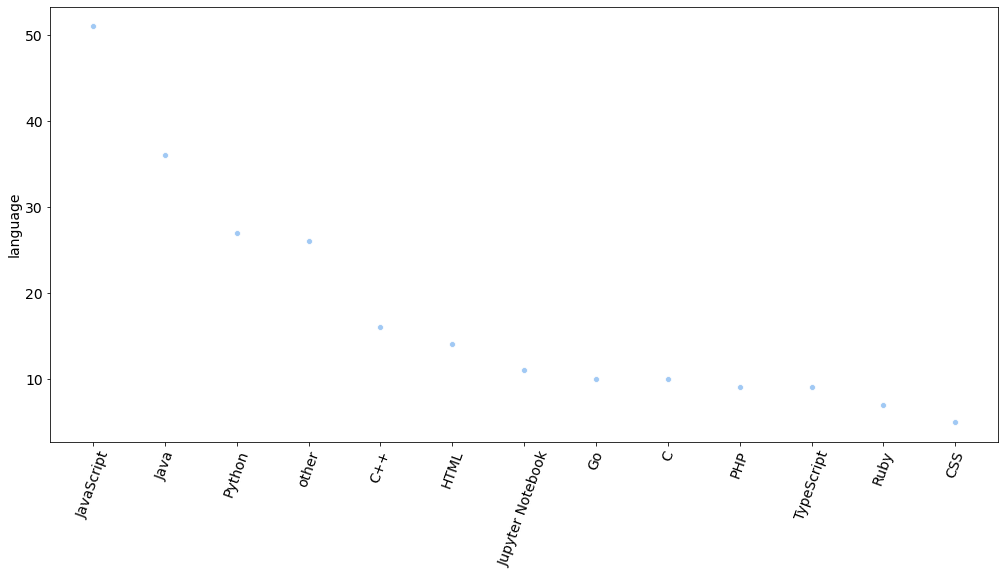

In [12]:
plt.figure(figsize=(17,8))
x = df_lang_count.index
y = df_lang_count.language
sns.scatterplot(data=df_lang_count, x=x, y=y)
plt.xticks(rotation=70)

plt.show()

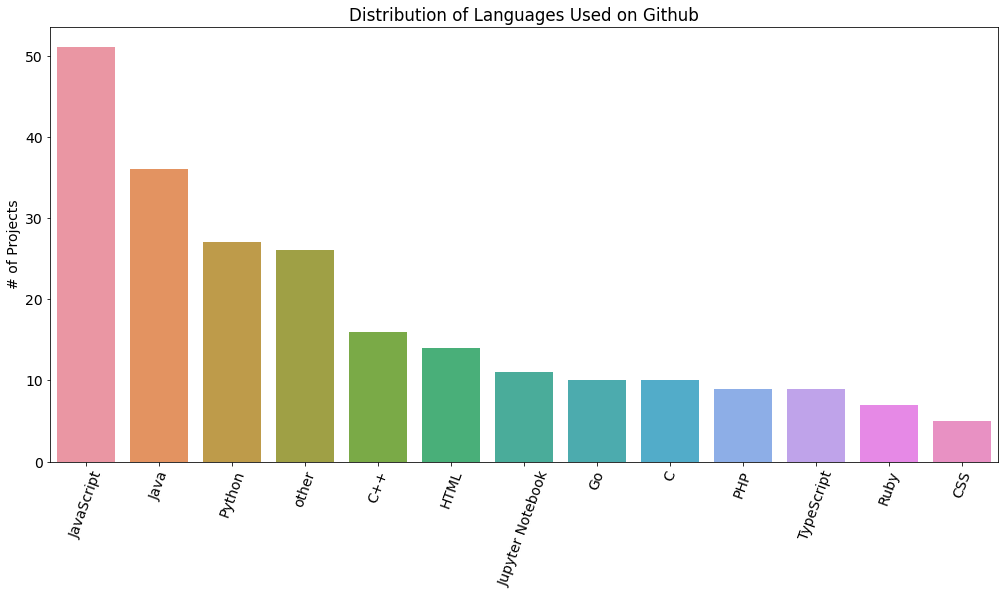

In [13]:
plt.figure(figsize=(17,8))
x = df_lang_count.index
y = df_lang_count.language
sns.barplot(data=df_lang_count, x=x, y=y)

plt.title("Distribution of Languages Used on Github")
plt.ylabel('# of Projects')

plt.xticks(rotation=70)
plt.show()

the languages included in 'others':
Shell, R, Vue, Groovy, Kotlin, Powershell, Rust, C#, ApacheConf, Objective-C, Scala, TeX, Dart, & Rascal

## exploring words used

Simple function to clean, remove spaces, and add them to a list for further exploration

In [14]:
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

implementing the clean function

In [15]:
df_clean = clean(' '.join(df.readme_contents))

In [16]:
df_clean

['introduction',
 'second',
 'programming',
 'assignment',
 'require',
 'write',
 'r',
 'function',
 'able',
 'cache',
 'potentially',
 'timeconsuming',
 'computation',
 'example',
 'taking',
 'mean',
 'numeric',
 'vector',
 'typically',
 'fast',
 'operation',
 'however',
 'long',
 'vector',
 'may',
 'take',
 'long',
 'compute',
 'mean',
 'especially',
 'computed',
 'repeatedly',
 'eg',
 'loop',
 'content',
 'vector',
 'changing',
 'may',
 'make',
 'sense',
 'cache',
 'value',
 'mean',
 'need',
 'looked',
 'cache',
 'rather',
 'recomputed',
 'programming',
 'assignment',
 'take',
 'advantage',
 'scoping',
 'rule',
 'r',
 'language',
 'manipulated',
 'preserve',
 'state',
 'inside',
 'r',
 'object',
 'example',
 'caching',
 'mean',
 'vector',
 'example',
 'introduce',
 'operator',
 'used',
 'assign',
 'value',
 'object',
 'environment',
 'different',
 'current',
 'environment',
 'two',
 'function',
 'used',
 'create',
 'special',
 'object',
 'store',
 'numeric',
 'vector',
 'cache',
 'm

A wordcloud  depicting the most commonly used words among all Github projects observed

(-0.5, 1199.5, 899.5, -0.5)

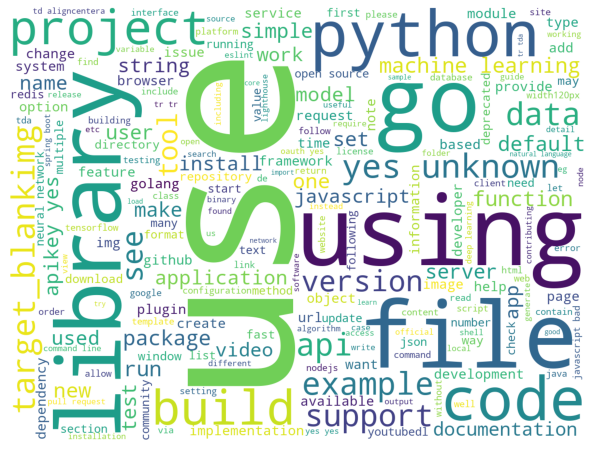

In [17]:
text = ' '.join(df_clean)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

## 25 most common words in readme


In [18]:
common_words = pd.Series(df_clean).value_counts()
common_words.sort_values().tail(25)

javascript     413
test           416
machine        432
example        436
version        443
api            445
support        456
run            459
see            463
function       465
install        479
learning       509
1              512
unknown        533
project        546
build          570
yes            665
code           752
using          763
data           771
python         806
file           828
use            889
library       1018
go            1070
dtype: int64

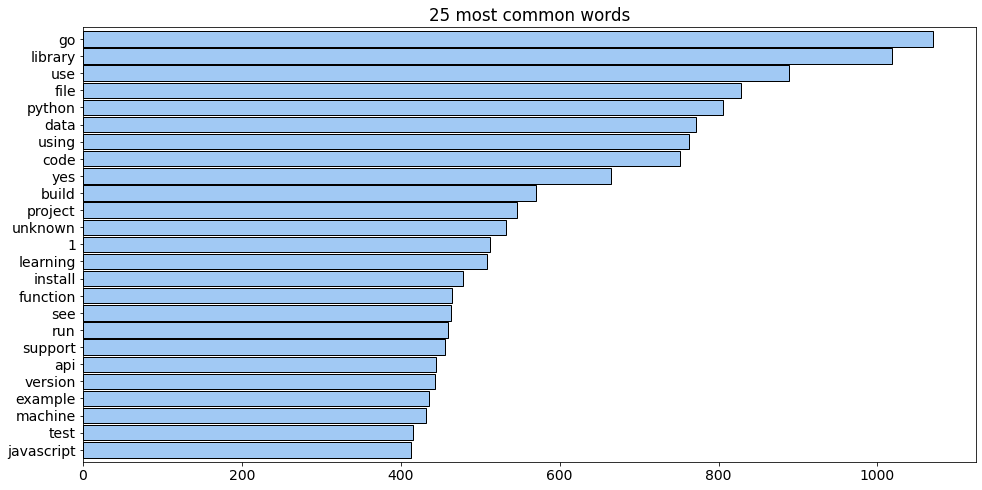

In [19]:
most_common_words = common_words.sort_values().tail(25)
most_common_words.drop(columns='all').plot.barh(width=.9, ec='black', title='25 most common words')

## Does the length of the README vary by programming language?

In [20]:
df.head(1)

,repo,language,readme_contents,clean_readme_contents,len_of_clean_readme_contents
0,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...,332


In [21]:
df2 = df[['language', 'clean_readme_contents']]

In [22]:
df2

,language,clean_readme_contents
0,R,introduction second programming assignment req...
1,HTML,well hello repository meant provide example fo...
2,C++,div aligncenter srchttpswwwtensorfloworgimages...
3,Groovy,smartthings public github repo official list s...
4,JavaScript,p aligncenter hrefhttpsgetbootstrapcom srchttp...
...,...,...
226,TypeScript,ngxadmin srchttpsiimgurcomomcxwz0png alteva de...
227,R,swirl course collection interactive course use...
228,C++,jennic platform added note detail project plea...
229,Go,etcd go report cardhttpsgoreportcardcombadgegi...


In [23]:
#languages = ['Shell', 'R', 'Vue', 'Groovy', 'Kotlin', 'Powershell', 'Rust', 'C#', 'ApacheConf', 'Objective-C', 'Scala', 'TeX', 'Dart', 'Rascal']

#df2.language = df.columns.str.replace(languages, 'other')

In [24]:
#df2['cleaned'] = ' '.join(df.clean_readme_contents)
df2['cleaned_readme'] = df2.clean_readme_contents.apply(clean)

In [25]:
df2['length_of_readme'] = df2.cleaned_readme.apply(len)
df2.head()

,language,clean_readme_contents,cleaned_readme,length_of_readme
0,R,introduction second programming assignment req...,"[introduction, second, programming, assignment...",332
1,HTML,well hello repository meant provide example fo...,"[well, hello, repository, meant, provide, exam...",60
2,C++,div aligncenter srchttpswwwtensorfloworgimages...,"[div, aligncenter, srchttpswwwtensorfloworgima...",428
3,Groovy,smartthings public github repo official list s...,"[smartthings, public, github, repo, official, ...",32
4,JavaScript,p aligncenter hrefhttpsgetbootstrapcom srchttp...,"[p, aligncenter, hrefhttpsgetbootstrapcom, src...",559


> Scatter plot where length of readme is y-axis, x-axis is how many programming languages and hue is label of programming language

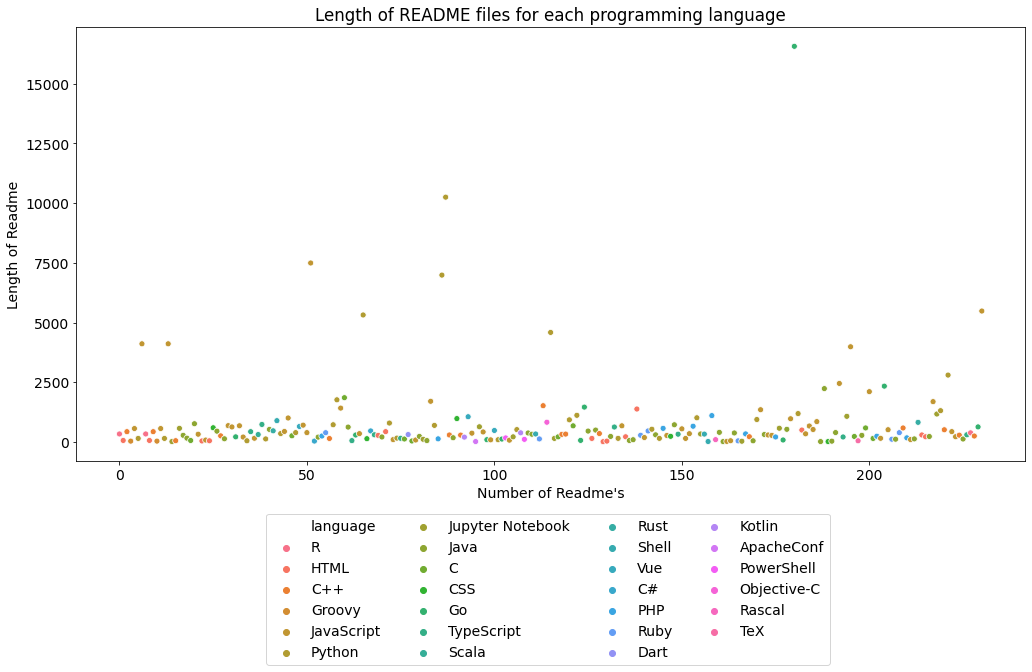

In [26]:
plt.figure(figsize=(17,8))
plt.title('Length of README files for each programming language')
x
x = df2.index
y = df2.length_of_readme
hue = df2.language
sns.scatterplot(data=df_lang_count, x=x, y=y, hue=hue)
plt.ylabel('Length of Readme')
plt.xlabel('Number of Readme\'s')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(0.2, -0.12), loc=2, borderaxespad=0., ncol=4)

plt.show()

In [27]:
df2 = df2.sort_values(by='length_of_readme', ascending=False)

Which Languages have the longest readme's?

In [28]:
df_len = df2.groupby('language').mean()

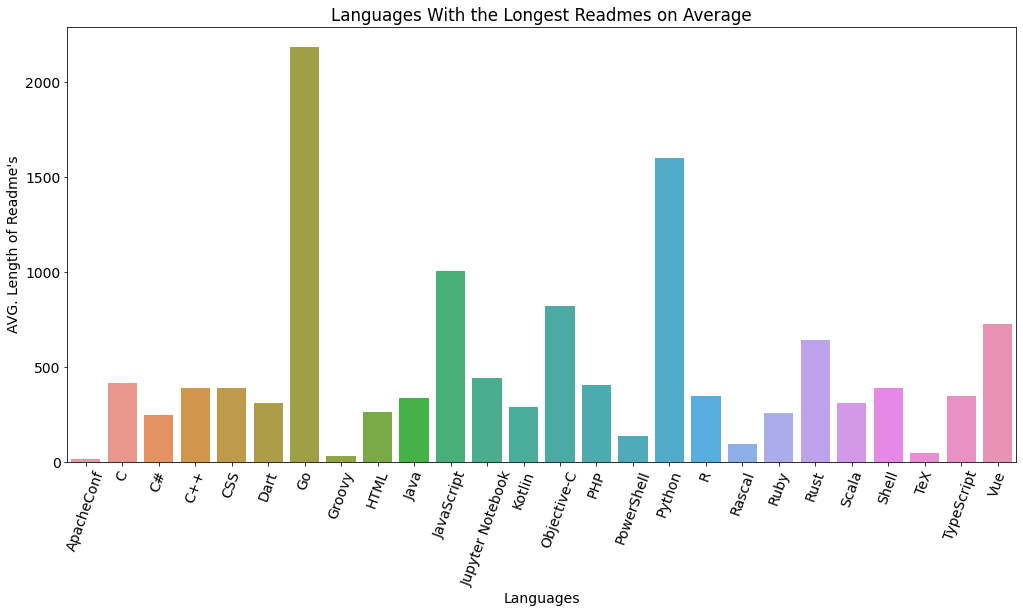

In [29]:
plt.figure(figsize=(17,8))
x = df_len.index
y = df_len.length_of_readme
sns.barplot(data=df_len, x=x, y=y)

plt.title("Languages With the Longest Readmes on Average")
plt.ylabel('AVG. Length of Readme\'s')
plt.xlabel('Languages')

plt.xticks(rotation=70)
plt.show()

Median longest readme's

In [30]:
df_len_med = df2.groupby('language').median()

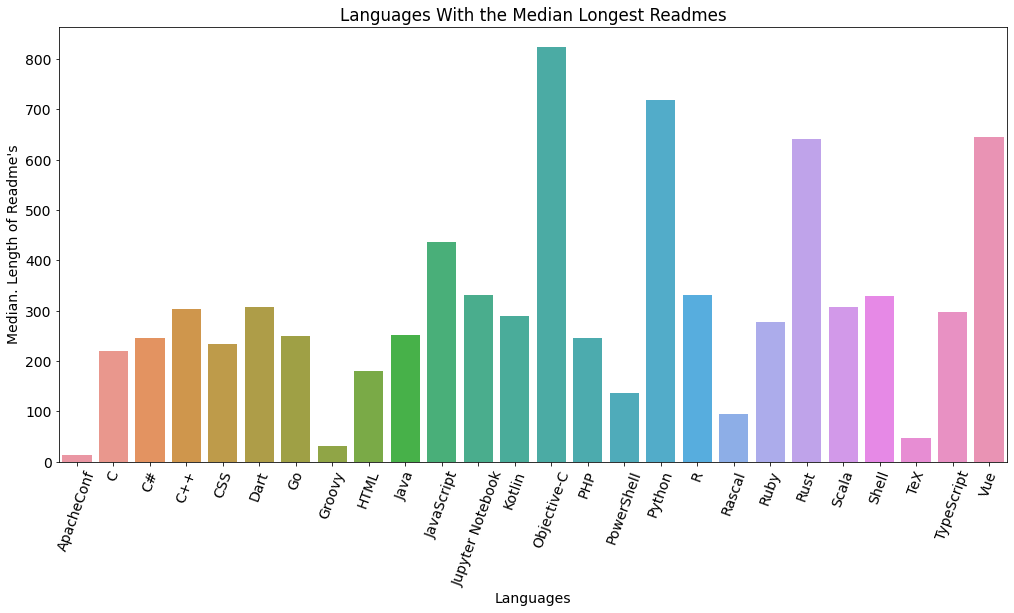

In [31]:
plt.figure(figsize=(17,8))
x = df_len_med.index
y = df_len_med.length_of_readme
sns.barplot(data=df_len_med, x=x, y=y)

plt.title("Languages With the Median Longest Readmes")
plt.ylabel('Median. Length of Readme\'s')
plt.xlabel('Languages')

plt.xticks(rotation=70)
plt.show()

### Word Frequency by language

In [32]:
df2.head()

,language,clean_readme_contents,cleaned_readme,length_of_readme
180,Go,awesome go build statushttpstravisciorgavelino...,"[awesome, go, build, statushttpstravisciorgave...",16569
87,Python,awesome machine learning awesomehttpscdnrawgit...,"[awesome, machine, learning, awesomehttpscdnra...",10251
51,JavaScript,airbnb javascript style guide mostly reasonabl...,"[airbnb, javascript, style, guide, mostly, rea...",7493
86,Python,build statushttpstravisciorgytdlorgyoutubedlsv...,"[build, statushttpstravisciorgytdlorgyoutubedl...",6986
230,JavaScript,httpslh4googleusercontentcompvwzum9vv8uuweh51o...,[httpslh4googleusercontentcompvwzum9vv8uuweh51...,5481


### biggest readme's by language

In [33]:
words_by_lang = df2.groupby('language').max()
words_by_lang = words_by_lang.sort_values(by='length_of_readme', ascending=False)
words_by_lang.length_of_readme

language
Go                  16569
Python              10251
JavaScript           7493
Java                 2232
C                    1851
C++                  1516
HTML                 1377
Jupyter Notebook     1168
PHP                  1101
Vue                  1054
CSS                   976
Shell                 889
Objective-C           823
Rust                  819
TypeScript            730
Ruby                  459
C#                    459
Kotlin                380
R                     379
Dart                  308
Scala                 308
PowerShell            166
Rascal                 94
TeX                    47
Groovy                 32
ApacheConf             14
Name: length_of_readme, dtype: int64

In [34]:
words_by_lang

,clean_readme_contents,cleaned_readme,length_of_readme
language,,,
Go,project v build status12 codecovio34 godoc56 c...,"[project, v, build, status12, codecovio34, god...",16569
Python,youget pypi versionhttpsimgshieldsiopypivyouge...,"[youget, pypi, versionhttpsimgshieldsiopypivyo...",10251
JavaScript,welcome bracket build statushttpstravisciorgad...,"[welcome, bracket, build, statushttpstraviscio...",7493
Java,zheng build statushttpstravisciorgshuzhengzhen...,"[zheng, build, statushttpstravisciorgshuzhengz...",2232
C,welcome lean ' git source openwrt package open...,"[welcome, lean, git, source, openwrt, package,...",1851
C++,srchttpwwwcocos2dxorgattachments801cocos2dxpor...,[srchttpwwwcocos2dxorgattachments801cocos2dxpo...,1516
HTML,well hello repository meant provide example fo...,"[well, hello, repository, meant, provide, exam...",1377
Jupyter Notebook,thecraftofselfteaching one ha future one ' tea...,"[thecraftofselfteaching, one, ha, future, one,...",1168
PHP,seclistspnghttpsdanielmiesslercomimagesseclist...,[seclistspnghttpsdanielmiesslercomimagesseclis...,1101


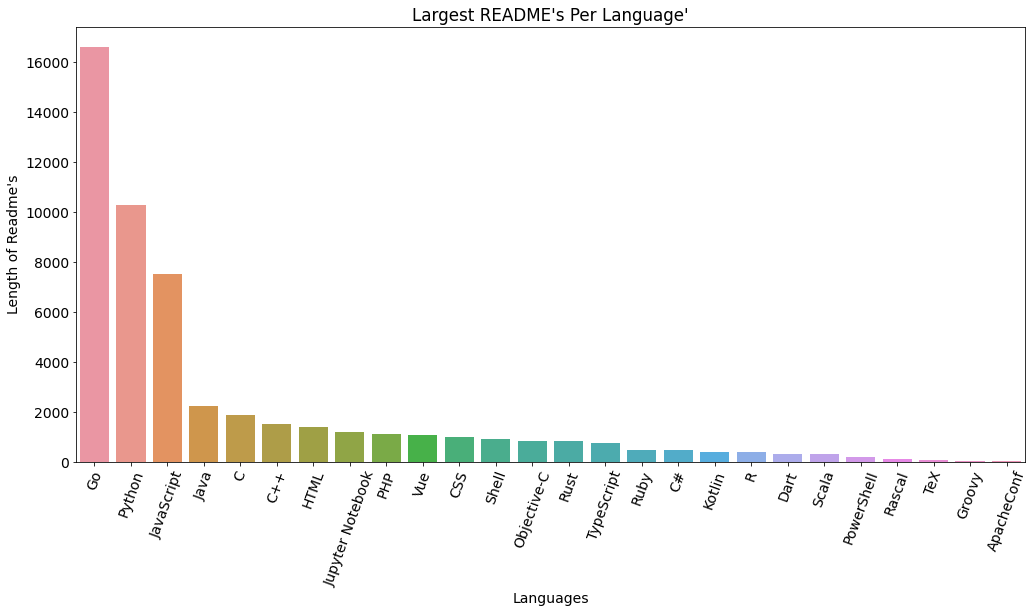

In [40]:
plt.figure(figsize=(17,8))
x = words_by_lang.index
y = words_by_lang.length_of_readme
sns.barplot(data=words_by_lang, x=x, y=y)

plt.title("Largest README\'s Per Language'")
plt.ylabel('Length of Readme\'s')
plt.xlabel('Languages')

plt.xticks(rotation=70)
plt.show()

### Total words used per language

In [36]:
total_words_per_lang = df2.groupby('language').sum()
total_words_per_lang = words_by_lang.sort_values(by='length_of_readme', ascending=False)
total_words_per_lang.length_of_readme

language
Go                  16569
Python              10251
JavaScript           7493
Java                 2232
C                    1851
C++                  1516
HTML                 1377
Jupyter Notebook     1168
PHP                  1101
Vue                  1054
CSS                   976
Shell                 889
Objective-C           823
Rust                  819
TypeScript            730
Ruby                  459
C#                    459
Kotlin                380
R                     379
Dart                  308
Scala                 308
PowerShell            166
Rascal                 94
TeX                    47
Groovy                 32
ApacheConf             14
Name: length_of_readme, dtype: int64

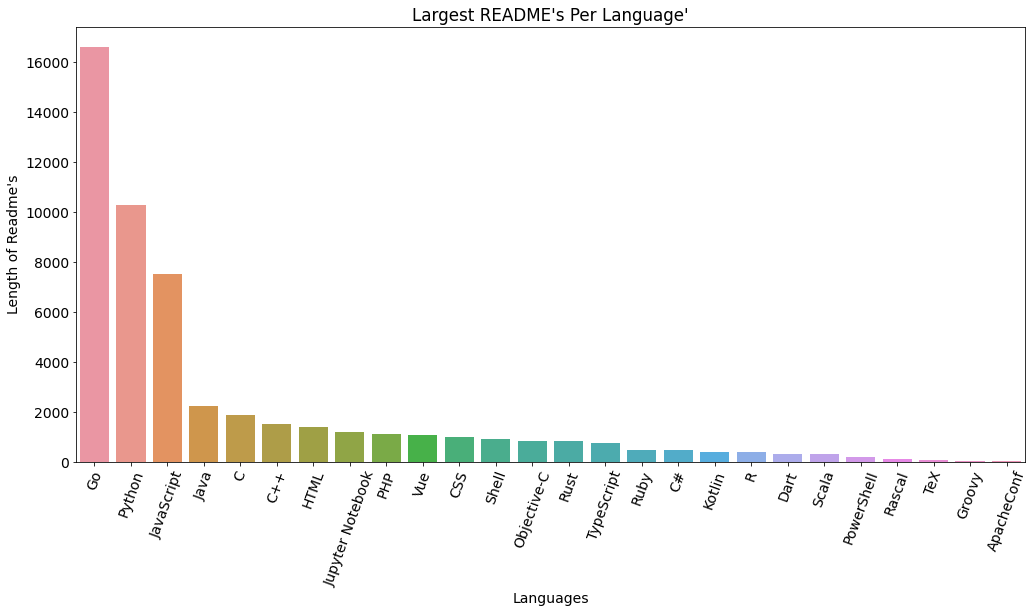

In [41]:
plt.figure(figsize=(17,8))
x = total_words_per_lang.index
y = total_words_per_lang.length_of_readme
sns.barplot(data=total_words_per_lang, x=x, y=y)

plt.title("Largest README\'s Per Language'")
plt.ylabel('Length of Readme\'s')
plt.xlabel('Languages')

plt.xticks(rotation=70)
plt.show()

### What are the most common words per language?

In [85]:
df2.head(1)

,language,clean_readme_contents,cleaned_readme,length_of_readme
180,Go,awesome go build statushttpstravisciorgavelino...,"[awesome, go, build, statushttpstravisciorgave...",16569


In [42]:
df2.head(1)

,language,clean_readme_contents,cleaned_readme,length_of_readme
180,Go,awesome go build statushttpstravisciorgavelino...,"[awesome, go, build, statushttpstravisciorgave...",16569


In [67]:
go_words = clean(' '.join(df2[df2.language == 'Go'].clean_readme_contents))
python_words = clean(' '.join(df2[df2.language == 'Python'].clean_readme_contents))
javascript_words = clean(' '.join(df2[df2.language == 'JavaScript'].clean_readme_contents))
all_words = clean(' '.join(df2.clean_readme_contents))

In [68]:
go_freq = pd.Series(go_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
javascript_freq = pd.Series(javascript_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [69]:
word_counts = (pd.concat([all_freq, go_freq, python_freq, javascript_freq], axis=1, sort=True)
              .set_axis(['all', 'go', 'python', 'javascript'], axis=1, inplace=False)
              .fillna(0)
              .apply(lambda s: s.astype(int)))

In [70]:
word_counts.head()

,all,go,python,javascript
0,95,10,11,59
000,2,0,0,1
0000,1,1,0,0
00000,2,0,0,2
00042,1,0,1,0


### What are the most frequently occuring words?

In [94]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,go,python,javascript
go,1070,933,53,44
library,1019,382,451,74
use,889,64,174,390
file,830,123,187,264
python,808,7,608,2
data,771,86,418,125
using,763,95,170,269
code,752,89,207,197
build,571,53,61,129
project,546,60,58,153


In [89]:
def word_freq(df):
    '''
    creates a list of words by language
    drops them into a series & turns them into a dataframe showing
    the most frequent words per language
    '''
    # lang_words
    go_words = ' '.join(df2[df2.language == 'Go'].clean_readme_contents).split()
    python_words = ' '.join(df2[df2.language == 'Python'].clean_readme_contents).split()
    javascript_words = ' '.join(df2[df2.language == 'JavaScript'].clean_readme_contents).split()
    java_words = ' '.join(df2[df2.language == 'Java'].clean_readme_contents).split()
    c_words = ' '.join(df2[df2.language == 'C'].clean_readme_contents).split()
    cplus_words = ' '.join(df2[df2.language == 'C++'].clean_readme_contents).split()
    HTML_words = ' '.join(df2[df2.language == 'HTML'].clean_readme_contents).split()
    Jupyter_words = ' '.join(df2[df2.language == 'Jupyter Notebook'].clean_readme_contents).split()
    Vue_words = ' '.join(df2[df2.language == 'Vue'].clean_readme_contents).split()
    CSS_words = ' '.join(df2[df2.language == 'CSS'].clean_readme_contents).split()
    shell_words = ' '.join(df2[df2.language == 'Shell'].clean_readme_contents).split()
    obj_words = ' '.join(df2[df2.language == 'Objective C'].clean_readme_contents).split()
    rust_words = ' '.join(df2[df2.language == 'Rust'].clean_readme_contents).split()
    Csharp_words = ' '.join(df2[df2.language == 'C#'].clean_readme_contents).split()
    kotlin_words = ' '.join(df2[df2.language == 'Kotlin'].clean_readme_contents).split()
    r_words = ' '.join(df2[df2.language == 'R'].clean_readme_contents).split()
    dart_words = ' '.join(df2[df2.language == 'Dart'].clean_readme_contents).split()
    scala_words = ' '.join(df2[df2.language == 'Scala'].clean_readme_contents).split()
    powershell_words = ' '.join(df2[df2.language == 'Powershell'].clean_readme_contents).split()
    Rascal_words = ' '.join(df2[df2.language == 'Rascal'].clean_readme_contents).split()
    tex_words = ' '.join(df2[df2.language == 'TeX'].clean_readme_contents).split()
    groovy_words = ' '.join(df2[df2.language == 'Groovy'].clean_readme_contents).split()
    apache_words = ' '.join(df2[df2.language == 'ApacheConf'].clean_readme_contents).split()
    PHP_words = ' '.join(df2[df2.language == 'PHP'].clean_readme_contents).split()
    type_words = ' '.join(df2[df2.language == 'TypeScript'].clean_readme_contents).split()
    all_words = ' '.join(df2.clean_readme_contents).split
    
    # Series
    go_freq = pd.Series(go_words).value_counts()
    python_freq = pd.Series(python_words).value_counts()
    javascript_freq = pd.Series(javascript_words).value_counts()
    java_freq = pd.Series(java_words).value_counts()
    c_freq = pd.Series(c_words).value_counts()
    cplus_freq = pd.Series(cplus_words).value_counts()
    html_freq = pd.Series(HTML_words).value_counts()
    jup_freq = pd.Series(Jupyter_words).value_counts()
    vue_freq = pd.Series(Vue_words).value_counts()
    css_freq = pd.Series(CSS_words).value_counts()
    shell_freq = pd.Series(shell_words).value_counts()
    obj_freq = pd.Series(obj_words).value_counts()
    rust_freq = pd.Series(rust_words).value_counts()
    csharp_freq = pd.Series(Csharp_words).value_counts()
    kotlin_freq = pd.Series(kotlin_words).value_counts()
    r_freq = pd.Series(r_words).value_counts()
    dart_freq = pd.Series(dart_words).value_counts()
    scala_freq = pd.Series(scala_words).value_counts()
    powershell_freq = pd.Series(powershell_words).value_counts()
    rascal_freq = pd.Series(Rascal_words).value_counts()
    tex_freq = pd.Series(tex_words).value_counts()
    groovy_freq = pd.Series(groovy_words).value_counts()
    apache_freq = pd.Series(apache_words).value_counts()
    php_freq = pd.Series(PHP_words).value_counts()
    type_freq = pd.Series(type_words).value_counts()
    all_freq = pd.Series(all_words).value_counts()
    
    # Concatting into df
    word_counts = (pd.concat([all_freq, go_freq, python_freq, javascript_freq, java_freq,
                              c_freq, cplus_freq, html_freq, jup_freq, vue_freq, css_freq,
                              shell_freq, obj_freq, rust_freq, csharp_freq, kotlin_freq,
                              r_freq, dart_freq, scala_freq, powershell_freq, rascal_freq,
                              tex_freq, groovy_freq, apache_freq, php_freq, type_freq 
                             ], axis=1, sort=True)
              .set_axis(['all', 'go', 'python', 'javascript', 'java', 'c', 'c++', 'html', 'jupyter notebook',
                        'vue', 'css', 'shell', 'objective c', 'rust', 'c#', 'kotlin', 'r', 'dart', 'scala', 'powershell',
                        'rascal', 'tex', 'groovy', 'apacheconf', 'php', 'typescript'], axis=1, inplace=False)
              .fillna(0)
              .apply(lambda s: s.astype(int)))
    
    return word_counts
    

In [90]:
word = word_freq(df2)

In [91]:
word

,all,go,python,javascript,java,c,c++,html,jupyter notebook,vue,...,r,dart,scala,powershell,rascal,tex,groovy,apacheconf,php,typescript
<built-in method split of str object at 0x13b2cc000>,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
&#9;,0,2,3,269,63,0,0,31,2,0,...,0,0,0,0,0,0,0,0,54,0
',0,126,663,1633,181,33,47,36,97,22,...,14,3,0,0,0,0,0,0,102,24
0,0,10,11,59,8,1,2,0,2,0,...,0,0,0,0,0,0,0,0,0,2
000,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxingobjchttpsgithubcomthelevelupzxingobjc,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zxingorg,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zynga,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zypper,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Are there any words that uniquely identify what language a readme is in?

In [72]:
pd.concat([word_counts[word_counts.go == 0].sort_values(by='javascript').tail(6),
           word_counts[word_counts.go == 0].sort_values(by='python').tail(6),
          word_counts[word_counts.javascript == 0].sort_values(by='go').tail(6),
          word_counts[word_counts.javascript == 0].sort_values(by='python').tail(6),
          word_counts[word_counts.python == 0].sort_values(by='javascript').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='go').tail(6)
          ])

,all,go,python,javascript
npm,219,0,0,156
de,246,0,2,166
tr,262,0,39,179
tda,266,0,33,231
const,309,0,0,302
targetblankimg,412,0,4,324
kera,61,0,57,0
back,130,0,63,53
title,83,0,64,8
youtubedl,155,0,155,0


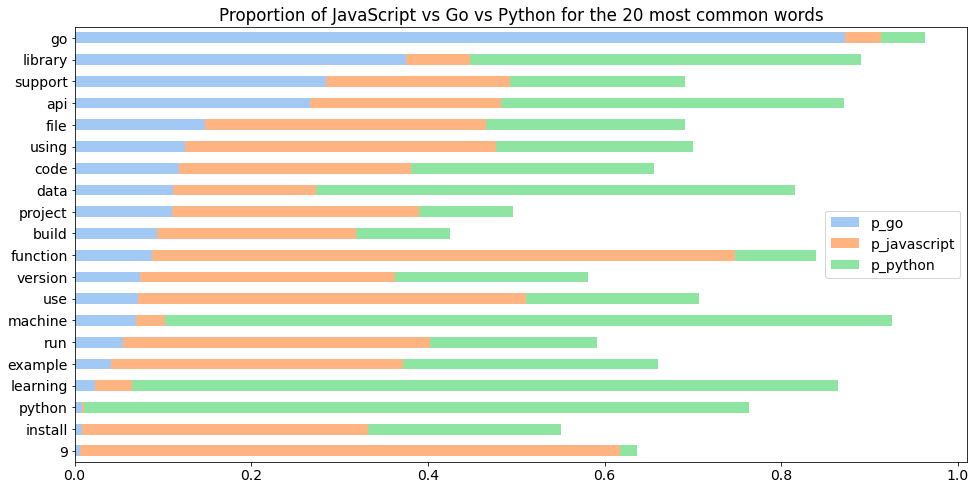

In [74]:
(word_counts
 .assign(p_go=word_counts.go / word_counts['all'],
         p_javascript=word_counts.javascript / word_counts['all'],
        p_python=word_counts.python / word_counts['all'])
 .sort_values(by='all')
 [['p_go', 'p_javascript', 'p_python']]
 .tail(20)
 .sort_values('p_go')
 .plot.barh(stacked=True))

plt.title('Proportion of JavaScript vs Go vs Python for the 20 most common words')
plt.show()

### Most used words visualized

In [ ]:
most_common_words = common_words.sort_values().tail(25)
most_common_words.drop(columns='all').plot.barh(width=.9, ec='black', title='25 most common words')

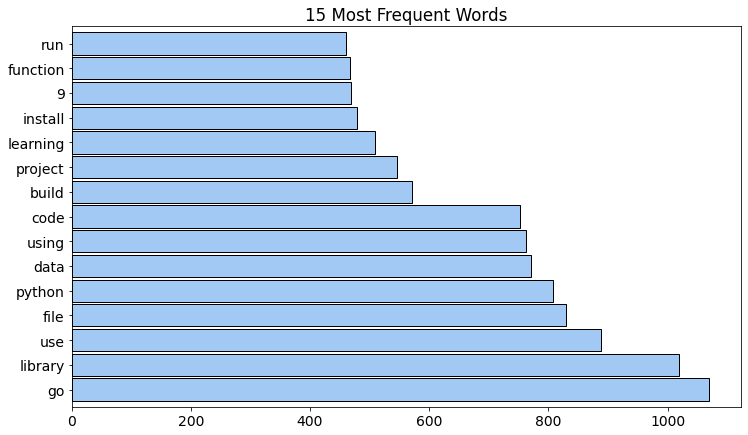

In [84]:
plt.figure(figsize=(12,7))
word_counts["all"].sort_values(ascending=False).head(15).plot.barh(width=.9, ec='black',
                                                                  title='15 Most Frequent Words')
plt.show()

## What does the distribution of IDFs look like for the most common words?


In [ ]:
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df_clean)

In [ ]:
tfidf = TfidfVectorizer()
bag_of_words = tfidf.fit_transform(df_clean)

In [ ]:
s_1 = pd.Series(dict(zip(tfidf.get_feature_names(), tfidf.idf_))).sort_values()

In [ ]:
df3 = pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names()).T

In [ ]:
s_1.sort_values()

### Do different programming languages use a different number of unique words?

In [1]:
len('a b c')

5